<a href="https://colab.research.google.com/github/JeffersonEspinalA/Prueba/blob/main/TF_Complex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

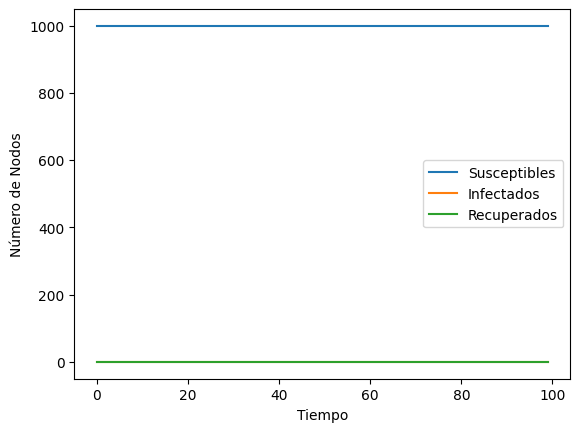

In [21]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

# Parámetros del modelo
N = 1000  # Número de nodos en la red
m = 5  # Número de conexiones iniciales por nodo
beta = 0.2  # Tasa de transmisión
gamma = 0.1  # Tasa de recuperación
T = 100  # Tiempo de simulación

# Crear la red Barabási–Albert
G = nx.barabasi_albert_graph(N, m)

# Inicializar el estado de los nodos
states = np.zeros(N)
states[random.randint(0, N-1)] = 1  # Nodo inicialmente infectado

# Simulación
susceptible_count = []
infected_count = []
recovered_count = []

for t in range(T):
    susceptible = np.sum(states == 0)
    infected = np.sum(states == 1)
    recovered = np.sum(states == 2)

    susceptible_count.append(susceptible)
    infected_count.append(infected)
    recovered_count.append(recovered)

    new_states = states.copy()

    for node in G.nodes():
        if states[node] == 1:  # Nodo infectado
            neighbors = list(G.neighbors(node))
            infected_neighbors = sum(states[n] == 0 for n in neighbors)
            transmission_prob = 1 - (1 - beta) ** infected_neighbors

            if random.random() < transmission_prob:
                new_states[node] = 1  # Permanece infectado
        elif states[node] == 1:  # Nodo recuperado
            if random.random() < gamma:
                new_states[node] = 2  # Recuperado

    states = new_states

# Graficar los resultados
plt.plot(susceptible_count, label='Susceptibles')
plt.plot(infected_count, label='Infectados')
plt.plot(recovered_count, label='Recuperados')
plt.xlabel('Tiempo')
plt.ylabel('Número de Nodos')
plt.legend()
plt.show()


<ipython-input-22-40e90a111d3a>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes(), initial_infected)


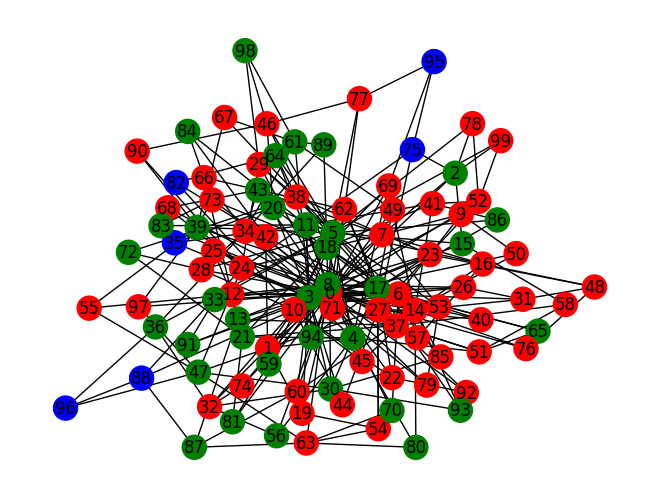

In [22]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def initialize_population(graph, initial_infected):
    population = {}
    for node in graph.nodes():
        population[node] = "S"  # Todos los nodos son susceptibles (S)
    infected_nodes = random.sample(graph.nodes(), initial_infected)
    for node in infected_nodes:
        population[node] = "I"  # Algunos nodos iniciales se marcan como infectados (I)
    return population

def simulate_spread(graph, population, infection_rate, recovery_rate, max_iterations):
    for _ in range(max_iterations):
        next_population = population.copy()
        for node in graph.nodes():
            if population[node] == "I":
                # Nodo infectado
                neighbors = list(graph.neighbors(node))
                for neighbor in neighbors:
                    if population[neighbor] == "S":
                        # Vecino susceptible
                        if random.random() < infection_rate:
                            next_population[neighbor] = "I"  # Se infecta
            if population[node] == "I":
                # Nodo infectado
                if random.random() < recovery_rate:
                    next_population[node] = "R"  # Se recupera
        population = next_population
    return population

def plot_population(graph, population):
    pos = nx.spring_layout(graph)
    node_colors = []
    for node in graph.nodes():
        if population[node] == "S":
            node_colors.append("blue")  # Susceptible: azul
        elif population[node] == "I":
            node_colors.append("red")  # Infectado: rojo
        else:
            node_colors.append("green")  # Recuperado: verde
    nx.draw(graph, pos, node_color=node_colors, with_labels=True)
    plt.show()

# Parámetros de simulación
N = 100  # Número de nodos
m = 3  # Número de enlaces que establece cada nodo
initial_infected = 5  # Número inicial de nodos infectados
infection_rate = 0.2  # Tasa de infección
recovery_rate = 0.1  # Tasa de recuperación
max_iterations = 10  # Número máximo de iteraciones

# Generar red Barabási–Albert
graph = nx.barabasi_albert_graph(N, m)

# Inicializar población
population = initialize_population(graph, initial_infected)

# Simular propagación del COVID-19
population = simulate_spread(graph, population, infection_rate, recovery_rate, max_iterations)

# Graficar población
plot_population(graph, population)
